In [ ]:
from skimage.io import imread, imshow
from skimage import filters
import matplotlib.pylab as pylab

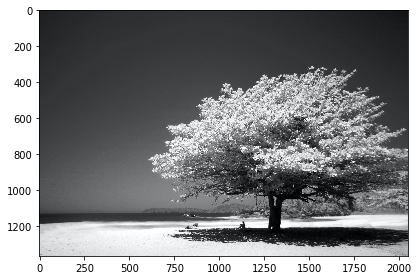

In [ ]:
org=imread('tree.jpg')
imshow(org)

In [ ]:
roberts=filters.roberts(org)
imshow(roberts)

ValueError: ignored

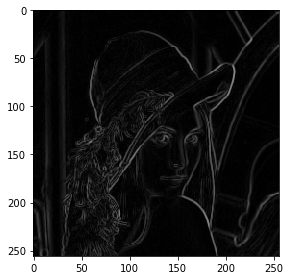

In [ ]:
prewitt=filters.prewitt(org)
imshow(prewitt)

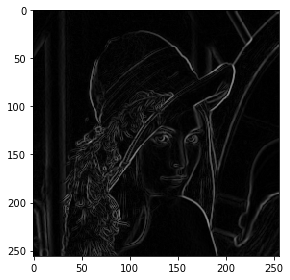

In [ ]:
# 잡음에 강함
sobel=filters.sobel(org)
imshow(sobel)

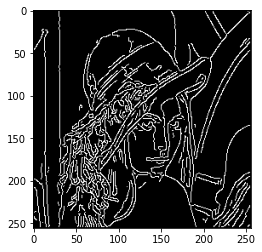

In [ ]:
from skimage import feature
canny = feature.canny(org)
pylab.imshow(img, cmap='gray')

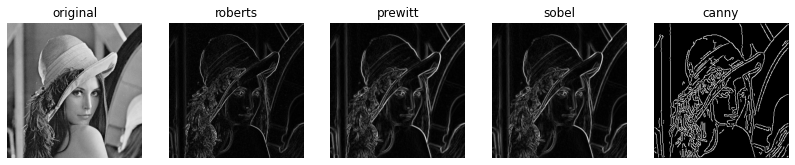

In [ ]:
org=imread('LENA256.jpg')

funcs=[lambda n: n, filters.roberts, filters.prewitt, filters.sobel, feature.canny]
strs=['original', 'roberts', 'prewitt', 'sobel', 'canny']

pylab.figure(figsize=(14,6))
for i in range(len(funcs)):
    img = funcs[i](org)
    pylab.subplot(1,5,i+1), pylab.imshow(img, cmap='gray')
    pylab.title(strs[i]), pylab.axis('off')

pylab.show()

In [ ]:
# 2차 미분 마스크
# 라플라시안 edge
# 잡음에 약하고, 영상 내의 가는 선이나 고립점에 강하게 반응

In [ ]:
mask1 = [
    [-1, -1, -1],
    [-1, 8, -1],
    [-1, -1, -1]
]
mask2 = [
    [0, 1, 0],
    [1, -4, 1],
    [0, 1, 0]
]

# 잡음에 약하고, 영상 내의 가는 선이나 고립점에 강하게 반응

In [ ]:
def edge2(org, mask, threshold=64):
    w = org.shape[0]
    h = org.shape[1]

    img = org.copy()
    for x in range(w):
        for y in range(h):
            img[x, y] = 0

    for x in range(1, w-1):
        for y in range(1, h-1):

            gradient = 0
            for i in range(-1, 2):
                for j in range(-1, 2):
                    gradient += org[x+i, y+j] * mask[i+1][j+1]

            if gradient < threshold:
                img[x, y] = 0
            else:
                img[x, y] = 255

    imshow(img)

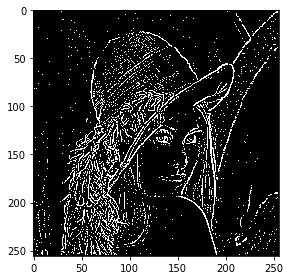

In [ ]:
edge2(org, mask1, threshold=64)

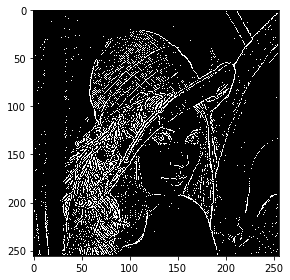

In [ ]:
edge2(org, mask2, threshold=32)

In [ ]:
# 1차 미분 마스크

import math

def edge1(org, maskR, maskC, threshold):
    w = org.shape[0]
    h = org.shape[1]

    img = org.copy()
    for x in range(w):
        for y in range(h):
            img[x, y] = 0

    for x in range(1, w-1):
        for y in range(1, h-1):

            gradientX = 0
            gradientY = 0
            for i in range(-1, 2):
                for j in range(-1, 2):
                    gradientX += org[x+i, y+j] * maskR[i+1][j+1]
                    gradientY += org[x+i, y+j] * maskC[i+1][j+1]

            magnitude = math.sqrt(gradientX * gradientX + gradientY * gradientY)

            if magnitude < threshold:
                img[x, y] = 0
            else:
                img[x, y] = 255

    imshow(img)

In [ ]:
# Sobel
# 잡음에 강함

maskR = [
    [1, 2, 1],
    [0, 0, 0],
    [-1, -2, -1]
]
maskC = [
    [-1, 0, 1],
    [-2, 0, 2],
    [-1, 0, 1]
]

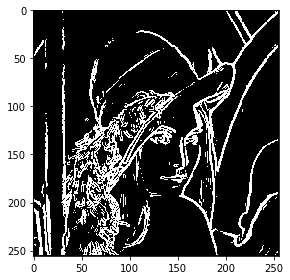

In [ ]:
edge1(org, maskR, maskC, threshold=128)